In [1]:
#importing packages
import pandas as pd
import string
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import joblib

In [2]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#dataset loading

df = pd.read_csv('/root/gpu_project/NLP-assignment-2/spam.csv', encoding='latin-1')

#keeping required columns only and renaming them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print("Dataset loaded successfully.")
print("Dataset preview:\n", df.head())

Dataset loaded successfully.
Dataset preview:
   label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
# text preprocessing
def preprocess_text(text):
    """
    1. convert text to lowercase.
    2. tokenize the text.
    3. remove punctuation.
    4. remove stopwords.
    5. return a clean list of words.
    """
    
    # 1. Lowercase
    text = text.lower()

    # 2. Tokenize
    tokens = word_tokenize(text)

    # 3. remove punctuation and non-alphanumeric characters
    words = [word for word in tokens if word.isalnum()]

    # 4. remove stopwords
    stop_words = set(stopwords.words('english'))
    clean_words = [word for word in words if word not in stop_words]

    # join the words into single string
    return " ".join(clean_words)

# apply function to 'message' column
df['clean_message'] = df['message'].apply(preprocess_text)
 
print("Dataset preview after cleaning:\n", df.head())


Dataset preview after cleaning:
   label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4             nah think goes usf lives around though  


In [ ]:
# Feature Extraction using TF-IDF

# initialize TfidfVectorizer object to convert text into a matrix of TF-IDF features.
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['clean_message'])
# convert 'label' column to numerical values (spam=1, ham=0)
y = df['label'].map({'spam': 1, 'ham': 0})
 


In [6]:
# training navie bayes model

# split data into training, esting sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and train the Complement Naïve Bayes classifier
model = ComplementNB()
model.fit(X_train, y_train)
print("training complete.")
 

training complete.


In [7]:
# model evaluation 
# Make predictions on the test set
y_pred = model.predict(X_test)

In [8]:
# metrics calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Model Evaluation Results ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

 


--- Model Evaluation Results ---
Accuracy:  0.9211
Precision: 0.6462
Recall:    0.9133
F1-Score:  0.7569



Confusion Matrix:


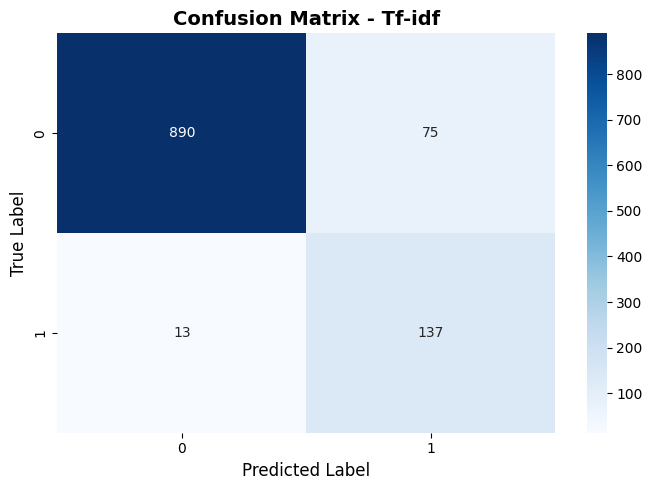

In [ ]:
# confusion matrix
print("\nConfusion Matrix:") 

cm_tfidf = confusion_matrix(y_test, y_pred)

# Plot confusion matrices
fig, axes = plt.subplots(figsize=(7, 5))

# Tf-idf Confusion Matrix  
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', ax=axes,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
axes.set_title('Confusion Matrix - Tf-idf', fontsize=14, fontweight='bold')
axes.set_xlabel('Predicted Label', fontsize=12)
axes.set_ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# Classification report for Tf-Idf
print("\nClassification Report for Tf-Idf:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))




Classification Report for Tf-Idf:
              precision    recall  f1-score   support

         Ham       0.99      0.92      0.95       965
        Spam       0.65      0.91      0.76       150

    accuracy                           0.92      1115
   macro avg       0.82      0.92      0.85      1115
weighted avg       0.94      0.92      0.93      1115



In [ ]:
#model file saving for future use 
joblib.dump(model, '/root/gpu_project/NLP-assignment-2/tf-idf-model-files/nb_complement_model.joblib')

# saving the tf-idf vectorizer
joblib.dump(vectorizer, '/root/gpu_project/NLP-assignment-2/tf-idf-model-files/nb_complement_vectorizer.joblib')
print("Model files saved successfully.")
 

Model files saved successfully.


In [17]:
# test with new text 
def predict_message(message):
    """Predicts if a new message is spam or ham."""
    clean_message = preprocess_text(message)
    message_vector = vectorizer.transform([clean_message])
    prediction = model.predict(message_vector)
    return "Spam" if prediction[0] == 1 else "Ham"

In [13]:
# example test- unseen values
print("\n--- Testing with new messages ---")
test_message_1 = "Congratulations! You have won a car in lucky draw at jeeto Pakistan."
print(f"Message: '{test_message_1}'")
print(f"Prediction: {predict_message(test_message_1)}\n")

test_message_2 = "Hey, are we still on for the meeting tomorrow at Savour foods?"
print(f"Message: '{test_message_2}'")
print(f"Prediction: {predict_message(test_message_2)}")




--- Testing with new messages ---
Message: 'Congratulations! You have won a car in lucky draw at jeeto Pakistan.'
Prediction: Spam

Message: 'Hey, are we still on for the meeting tomorrow at Savour foods?'
Prediction: Ham
